In [1]:
models_to_test = ["nickmuchi/sec-bert-finetuned-finance-classification", "ProsusAI/finbert", "ahmedrachid/FinancialBERT-Sentiment-Analysis", "yiyanghkust/finbert-tone", "nickmuchi/deberta-v3-base-finetuned-finance-text-classification", "soleimanian/financial-roberta-large-sentiment", "bardsai/finance-sentiment-pl-fast", "RashidNLP/Finance-Sentiment-Classification", "siebert/sentiment-roberta-large-english", "kwang123/bert-sentiment-analysis", "distilbert/distilbert-base-uncased-finetuned-sst-2-english"]

/Users/judi/Documents/Jonas/Advanced-Analytics-and-Machine-Learning/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/judi/Documents/Jonas/Advanced-Analytics-and-Machine-Learning/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
                                               
100%|██████████| 41/41 [00:58<00:00,  1.22s/it]

{'eval_loss': 0.654242992401123, 'eval_accuracy': 0.7545454545454545, 'eval_precision': 0.5693388429752065, 'eval_recall': 0.7545454545454545, 'eval_f1': 0.6489872821479038, 'eval_runtime': 7.2957, 'eval_samples_per_second': 15.077, 'eval_steps_per_second': 1.919, 'epoch': 1.0}


There were missing keys in the checkpoint model loaded: ['distilbert.prompt_tuning.base_model_embeddings.weight'].
100%|██████████| 41/41 [01:00<00:00,  1.47s/it]


{'train_runtime': 60.1214, 'train_samples_per_second': 5.456, 'train_steps_per_second': 0.682, 'train_loss': 1.7871709684046304, 'epoch': 1.0}


100%|██████████| 14/14 [00:06<00:00,  2.18it/s]


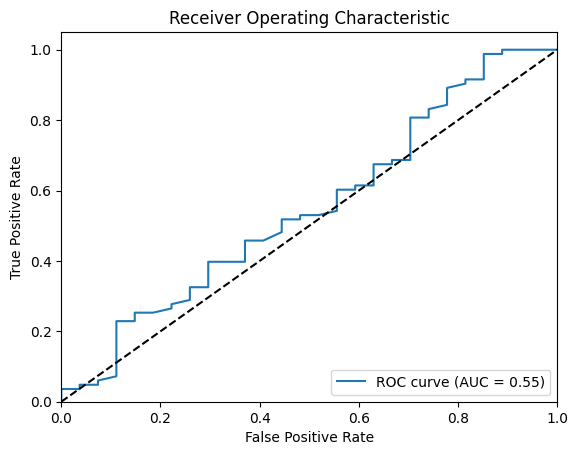

In [1]:
import pandas as pd
from build_model import CustomTransformerModel
from evaluate_model import ModelEvaluator

#stop warnings
import warnings
warnings.filterwarnings('ignore')

# Load the training and evaluation data

# List of [model_name, adapter_name, column_name] combinations
combinations = [
    ["bardsai/finance-sentiment-pl-fast", True, 'BullsList'],
    # Add more combinations as needed
]

# Load the training and evaluation data
train_df = pd.read_csv('1. data/final/train.csv')
eval_df = pd.read_csv('1. data/final/test.csv')

for model_name, adapter, column_name in combinations:
    # Create an instance of CustomTransformerModel
    model = CustomTransformerModel(model_name=model_name, adapter=adapter, column_name=column_name)

    # Build the model
    model.build_model()

    # Train the model
    model.train(train_df, eval_df, epochs=1, batch_size=8, learning_rate=2e-2, seed=42, save_model=False)

# Load the true labels
eval_df = pd.read_csv('1. data/final/test.csv')
true_labels = eval_df['Label']

# Create an instance of ModelEvaluator
evaluator = ModelEvaluator(true_labels, combinations)

# Evaluate the models
evaluator.evaluate()


